<a href="https://colab.research.google.com/github/SumitNikhade/Machine-learning/blob/main/Simple_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')

In [4]:
df.head()

,height,weight
0,145,60
1,146,61
2,147,62
3,148,63
4,149,64


Text(0, 0.5, 'Height')

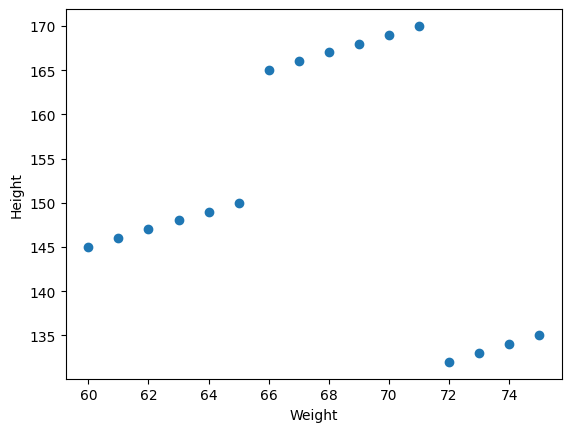

In [6]:
plt.scatter(df['weight'],df['height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [7]:
df.corr()

,height,weight
height,1.000000,-0.175203
weight,-0.175203,1.000000


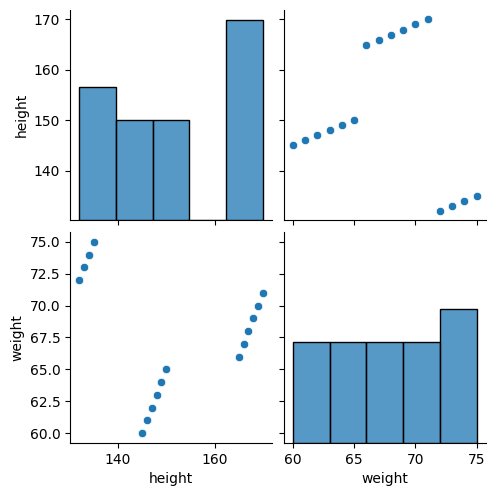

In [8]:
sns.pairplot(df)

In [9]:
X=df['weight']
y=df['height']
X



,weight
0,60
1,61
2,62
3,63
4,64
5,65
6,66
7,67
8,68
9,69


In [10]:
np.array(X)
np.array(X).shape

(16,)

In [11]:
np.array(X)

array([60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

In [13]:
X_train.shape

(11,)

In [14]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(np.array(X_train).reshape(-1,1))
X_test=sc.fit_transform(np.array(X_test).reshape(-1,1))

In [15]:
sc.fit_transform(X_train)

array([[ 0.80815057],
       [ 0.02376913],
       [ 0.28522961],
       [-1.54499374],
       [ 1.85399249],
       [-1.02207278],
       [-0.23769134],
       [ 0.54669009],
       [ 1.06961105],
       [-1.28353326],
       [-0.49915182]])

In [16]:
from sklearn.linear_model import LinearRegression
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
regression.coef_

array([-1.64007028])

In [18]:
print("intercept:",regression.intercept_)

intercept: 156.0


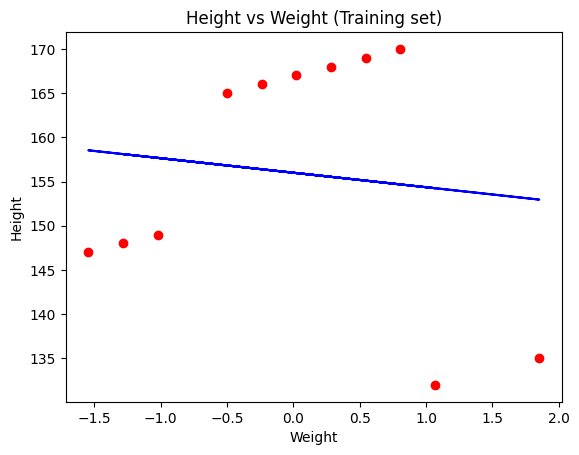

In [20]:
plt.scatter(X_train,y_train,color='red')
plt.plot(X_train,regression.predict(X_train),color='blue')
plt.title('Height vs Weight (Training set)')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

In [22]:
regression.predict(X_test)

array([157.83915127, 157.56049199, 156.44585485, 153.9379213 ,
       154.21658059])

In [23]:
y_pred=regression.predict(X_test)

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [26]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print('MSE:',mse)
print('MAE:',mae)
print('RMSE:',rmse)

MSE: 237.54036455592995
MAE: 14.4
RMSE: 15.412344550908857


In [28]:
from sklearn.metrics import r2_score


In [30]:
score=r2_score(y_test,y_pred)
print("R2:",score)

R2: -4.09306098962114


In [31]:
import statsmodels.api as sm

In [33]:
model=sm.OLS(y_train,X_train).fit()

In [34]:
model.predict(X_test)

array([ 1.83915127,  1.56049199,  0.44585485, -2.0620787 , -1.78341941])

In [35]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 height   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.100
Method:                 Least Squares   F-statistic:                           0.001097
Date:                Sat, 04 Jan 2025   Prob (F-statistic):                       0.974
Time:                        11:28:51   Log-Likelihood:                         -71.198
No. Observations:                  11   AIC:                                      144.4
Df Residuals:                      10   BIC:                                      144.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  res = hypotest_fun_out(*samples, **kwds)


In [38]:
regression.predict(sc.transform([[72]]))

array([37.91494017])